In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

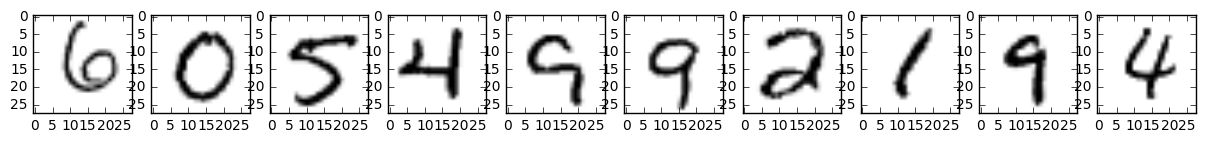

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i+100]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
import tflearn as tfl

In [7]:
# Building convolutional network
network = tfl.input_data(shape=[None, 784], name='input')
network = tfl.fully_connected(network, 10, activation='softmax')
network = tfl.regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

# Training
model = tfl.DNN(network, tensorboard_verbose=0)
model.fit({'input': mnist.train.images}, {'target': mnist.train.labels}, n_epoch=1,
           validation_set=({'input': mnist.test.images}, {'target': mnist.test.labels}),
           snapshot_step=100, show_metric=True, run_id='convnet_mnist')

Training Step: 859  | total loss: 0.37785 | time: 10.940s
| Adam | epoch: 001 | loss: 0.37785 - acc: 0.9133 -- iter: 54976/55000
Training Step: 860  | total loss: 0.36449 | time: 11.997s
| Adam | epoch: 001 | loss: 0.36449 - acc: 0.9173 | val_loss: 0.30111 - val_acc: 0.9170 -- iter: 55000/55000
--


In [8]:
# evaluation
model.evaluate(mnist.test.images, mnist.test.labels)

[0.91700000000000004]

In [9]:
# test item #100 is a "six"
pixels = mnist.test.images[100]

result = model.predict([pixels])
dict(zip(range(10), result[0]))

{0: 7.327728962991387e-05,
 1: 0.00016404673806391656,
 2: 0.014665036462247372,
 3: 0.00016035941371228546,
 4: 0.00013345149636734277,
 5: 6.6594848249224015e-06,
 6: 0.9846199154853821,
 7: 7.17706061550416e-05,
 8: 9.726810094434768e-05,
 9: 8.22681795398239e-06}

In [10]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

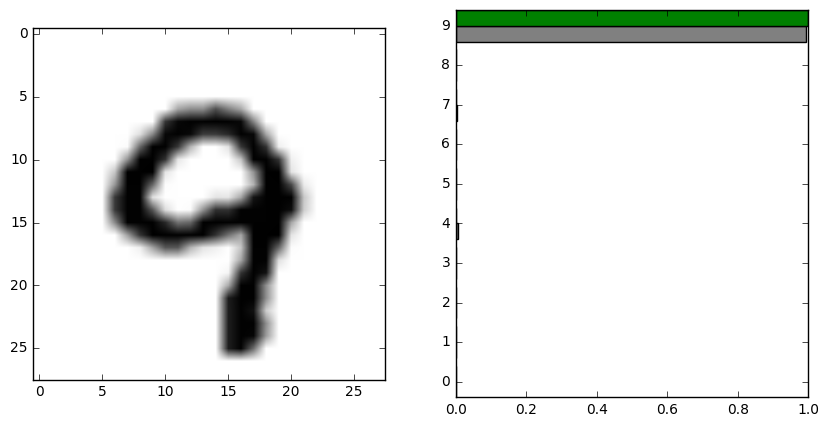

In [11]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict([pixels])[0]

test_render(pixels, result, truth)